### Latent Derelicht Analysis is a probabilistic model, to obtain cluster assignments

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [88]:
!pip install pyldavis

    100% |████████████████████████████████| 1.6MB 4.4MB/s ta 0:00:011
    100% |████████████████████████████████| 286kB 12.0MB/s a 0:00:01
  Running setup.py bdist_wheel for pyldavis ... done
  Stored in directory: /Users/loonycorn/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
dbpedia_df = pd.read_csv('./datasets/dbpedia_csv/train.csv', 
                         skiprows=1, names = ['Label', 'Name', 'Text'])

In [10]:
dbpedia_df.shape

(559999, 3)

In [11]:
NUM_SAMPLES = 10000

In [12]:
dbpedia_df = dbpedia_df.sample(NUM_SAMPLES, replace=False).reset_index(drop=True)

In [13]:
dbpedia_df.head(5)

Label               Name                                               Text
0     13   13 Men and a Gun   13 Men and a Gun is a 1938 British-Italian wa...
1     11  Anemone coronaria   Anemone coronaria (poppy anemone Spanish mari...
2      1    Espresso Vivace   Espresso Vivace is a Seattle area coffee shop...
3      9     Zardan Birjand   Zardan (Persian: زردان‎ also Romanized as Zar...
4      6         USS Nipsic   USS Nipsic was a gunboat in the Union Navy. T...

### DBPedia classes

- Company
- EducationalInstitution
- Artist
- Athlete
- OfficeHolder
- MeanOfTransportation
- Building
- NaturalPlace
- Village
- Animal
- Plant
- Album
- Film
- WrittenWork

In [14]:
sorted(dbpedia_df['Label'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [15]:
X = dbpedia_df['Text']

In [16]:
X.head()

0     13 Men and a Gun is a 1938 British-Italian wa...
1     Anemone coronaria (poppy anemone Spanish mari...
2     Espresso Vivace is a Seattle area coffee shop...
3     Zardan (Persian: زردان‎ also Romanized as Zar...
4     USS Nipsic was a gunboat in the Union Navy. T...
Name: Text, dtype: object

In [17]:
count_vectorizer = CountVectorizer(max_df=1000, min_df=3)

transformed_vector = count_vectorizer.fit_transform(X)

In [18]:
transformed_vector.shape

(10000, 10587)

In [19]:
feature_names = count_vectorizer.get_feature_names()

In [20]:
len(feature_names)

10587

In [21]:
feature_names[1000:1005]

['animated', 'animation', 'anime', 'anita', 'ankara']

In [22]:
NUM_TOPICS = 14

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100)

lda = lda_model.fit_transform(transformed_vector)

In [23]:
lda.shape

(10000, 14)

In [24]:
lda[:2]

array([[0.00297621, 0.0029762 , 0.0029762 , 0.00297619, 0.00297623,
        0.00297619, 0.0029762 , 0.0029762 , 0.00297619, 0.00297621,
        0.13813162, 0.00297619, 0.20010642, 0.62902375],
       [0.00396825, 0.13116581, 0.00396825, 0.00396828, 0.22619043,
        0.00396826, 0.00396826, 0.00396825, 0.00396826, 0.0600265 ,
        0.00396826, 0.40768959, 0.13921333, 0.00396827]])

In [25]:
sum(lda[0])

1.0

Variational parameters for topic word distribution. lda_model.components_[t, w] can be viewed as pseudocount that represents the number of times the word w was assigned to topic t

In [26]:
lda_model.components_.shape

(14, 10587)

In [63]:
def get_topic(identifier, top_words=10):
    
    for topic_id, topic_word_probs in enumerate(lda_model.components_):

        if topic_id == identifier:
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            
            return " ".join(top_feature_names)

In [64]:
for i in range(14):
    print("Topic %d:" % (i))

    print(get_topic(i, top_words=3))

Topic 0:
school high located
Topic 1:
university journal research
Topic 2:
member politician river
Topic 3:
mi village river
Topic 4:
his book published
Topic 5:
historic church house
Topic 6:
chinese aircraft air
Topic 7:
album released band
Topic 8:
company based owned
Topic 9:
de french la
Topic 10:
she class navy
Topic 11:
species genus are
Topic 12:
who village played
Topic 13:
film directed starring


In [66]:
topic_id_topic_mapping = {}

for i in range(14):
    topic_id_topic_mapping[i] = get_topic(i, top_words=3)
    
topic_id_topic_mapping

{0: 'school high located',
 1: 'university journal research',
 2: 'member politician river',
 3: 'mi village river',
 4: 'his book published',
 5: 'historic church house',
 6: 'chinese aircraft air',
 7: 'album released band',
 8: 'company based owned',
 9: 'de french la',
 10: 'she class navy',
 11: 'species genus are',
 12: 'who village played',
 13: 'film directed starring'}

In [72]:
topic_to_doc_mapping = {}
topic_list = []
topic_names = []

for i in range(NUM_SAMPLES):
    most_likely_topic =  lda[i].argmax()

    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic] = []

    topic_to_doc_mapping[most_likely_topic].append(i)
    
    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])

dbpedia_df['Most_Likely_Topic'] = topic_list
dbpedia_df['Most_Likely_Topic_Names'] = topic_names

In [73]:
print(topic_to_doc_mapping[0][:100])

[19, 28, 36, 66, 73, 77, 103, 108, 135, 146, 153, 159, 161, 170, 235, 249, 250, 253, 257, 259, 260, 265, 315, 317, 348, 351, 352, 358, 372, 431, 432, 440, 460, 481, 497, 539, 552, 566, 569, 579, 583, 589, 618, 641, 642, 698, 709, 738, 769, 774, 782, 788, 789, 795, 814, 816, 819, 884, 885, 899, 941, 950, 951, 956, 968, 977, 978, 999, 1017, 1032, 1041, 1060, 1074, 1089, 1092, 1099, 1102, 1104, 1119, 1127, 1135, 1144, 1148, 1150, 1165, 1180, 1187, 1203, 1204, 1237, 1246, 1257, 1259, 1277, 1286, 1312, 1326, 1361, 1368, 1373]


In [74]:
topic_of_interest = 13

doc_ids = topic_to_doc_mapping[topic_of_interest][:4]

for doc_index in doc_ids:
    print(X.iloc[doc_index])

 13 Men and a Gun is a 1938 British-Italian war film directed by Mario Zampi and starring Arthur Wontner Clifford Evans and Howard Marion-Crawford. It is an English-language version of the Italian film Tredici uomini e un cannone.
 All the Boys Love Mandy Lane is a 2006 American horror/thriller film directed by Jonathan Levine and starring Amber Heard Michael Welch Whitney Able and Anson Mount.
 Yagam is a 1980 Malayalam black-and-white film directed produced and co-cinematographed by Sivan and starring Babu Namboothiri Premji Kalpana Aranmula Ponnamma and Jalaja. The film won the National Film Award for Best Feature Film in Malayalam. O. N. V. Kurup won the Kerala State Film Award for Best Lyrics for the song Shravana Sandhyathan. Sivan and Mahesh won the Kerala State Film Award for Best Photography (black-and-white).
 The Marriage of Mr. Mississippi (German: Die Ehe des Herrn Mississippi) is a play by the Swiss writer Friedrich Dürrenmatt. The play was written in 1950 but Dürrenmatt 

In [75]:
dbpedia_df.sample(100)

Label                                               Name  \
4710      9              Starynia Warmian-Masurian Voivodeship   
7604      4                                      George Freese   
8713      8                                        Dent de Lys   
1025     12          Live in Japan (Simian Mobile Disco album)   
4295      7               Mount Hope (Ridgeway South Carolina)   
1844      6                           Japanese submarine I-168   
8971      8                                        Puntay Urqu   
41        9                                            Smerzyn   
7144      1                                         Abbey Life   
6378     13                       Young Man with a Horn (film)   
2302      1                             Arcadia Machine & Tool   
4850      2                   Robla Elementary School District   
5945      9                                    Gaziler Antalya   
5482      6                                      Albion (1813)   
7810      3                                Gonzalo de la Torre   
2846     14                               Murder in Amityville   
2464     13                              The Train (1970 film)   
6215      1                                       Go! Mokulele   
7825     14                                    Amazons (novel)   
3758      1                                        TMW Systems   
1417      7                                        Noosa Civic   
8427      1                                       Cinnamon Air   
3953      4                            Ali Haidar (basketball)   
1445      5                                     Edward B. Pond   
4911     14                           The Street (short story)   
2216      9                                     Kraszewo-Falki   
5553      6                              Discovery (1602 ship)   
9921      7                  Church of Holy Trinity Burrington   
1712      3                                  Juan Manuel Abras   
6209      8         Sunset Lake (Holly Springs North Carolina)   
...     ...                                                ...   
5555      3                                 Theodora Mead Abel   
6195      1                                          Healthtex   
9723      3                                       Chimako Tada   
6838      6                              Draug-class destroyer   
7775     14                    Love in the Time of Foreclosure   
6845      8                                      Rawhide Hills   
6302     12                Symphony Masses: Ho Drakon Ho Megas   
2826     10                                  Peltopleuriformes   
2588      3                                   Aakanksha Jachak   
5957     14                            The Hundredfold Problem   
4372      9                                         Owch Aghaj   
5277      4                                    Arthur Blackman   
3564     10                             Ecuadorian horned frog   
2658      1                                             Trapit   
1016     11                         Bulbophyllum stictosepalum   
6470      7                                 Mariazell Basilica   
3162     13                  Friday the Thirteenth (1933 film)   
1455      4                                 Sergio Valle-Ortiz   
1042      7                      Maria Skłodowska-Curie Museum   
3318      9                        Kamenica (Gornji Milanovac)   
4066     11                               Ravenea dransfieldii   
2175      6                                USS Bonita (SS-165)   
9413      7  Presbyterian Manse (Edisto Island South Carolina)   
4855     11                                 Uvularia floridana   
8848     12                 Sobrenatural (Alexis & Fido album)   
4925     12                                           Thuggin'   
7211      1                                     @radical.media   
3743     13                                           Roosters   
7395     13           The Hyperboloid of Engin

In [54]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors = 20, n_components = 2)

In [55]:
lda_2d_isomap = isomap.fit_transform(lda)

In [56]:
lda_df_isomap = pd.DataFrame(lda_2d_isomap)

lda_df_isomap.head()

0         1
0 -0.443329  0.043697
1  0.239249  0.318773
2  0.076696 -0.498537
3 -0.524893 -0.354713
4 -0.087991 -0.028022

In [57]:
lda_df_isomap.shape

(10000, 2)

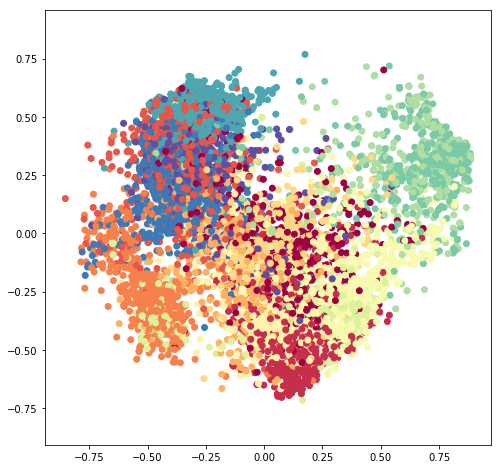

In [78]:
plt.subplots(figsize = (8, 8))
plt.axis('equal');

plt.scatter(lda_df_isomap[0], lda_df_isomap[1], c = dbpedia_df['Label'], cmap = plt.cm.Spectral)

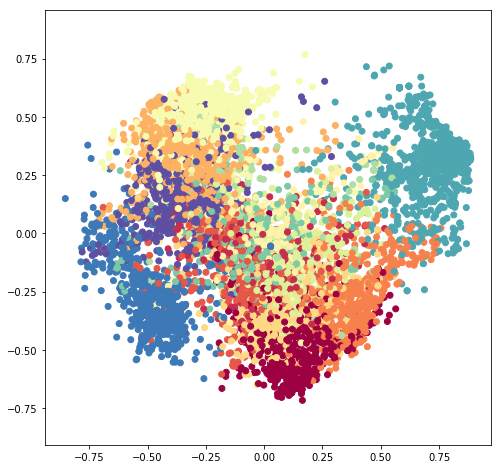

In [79]:
plt.subplots(figsize = (8, 8))
plt.axis('equal');

plt.scatter(lda_df_isomap[0], lda_df_isomap[1], c = dbpedia_df['Most_Likely_Topic'], cmap = plt.cm.Spectral)

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

In [81]:
lda_2d_tsne = tsne.fit_transform(lda)

In [82]:
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape

(10000, 2)

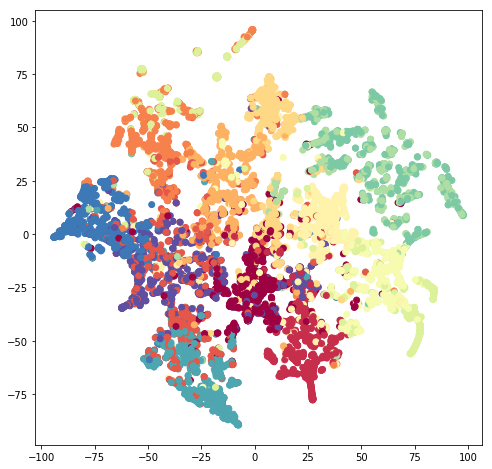

In [86]:
plt.subplots(figsize = (8, 8))
plt.axis('equal');

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c = dbpedia_df['Label'], cmap = plt.cm.Spectral)

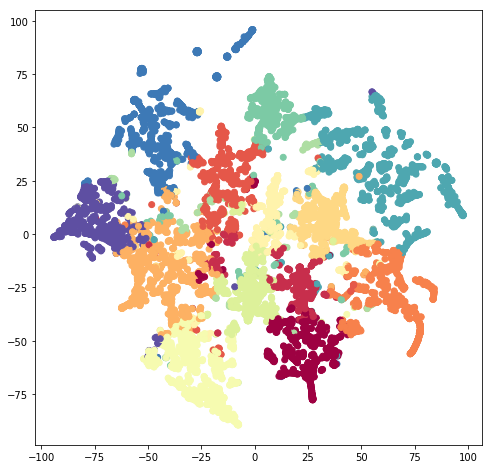

In [87]:
plt.subplots(figsize = (8, 8))
plt.axis('equal');

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c = dbpedia_df['Most_Likely_Topic'], cmap = plt.cm.Spectral)

In [91]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

In [92]:
panel = pyLDAvis.sklearn.prepare(lda_model, transformed_vector, count_vectorizer, mds='tsne')

panel

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4     -302.145477  208.515854       1        1  11.339821
11    -114.458153  334.850220       2        1   8.828527
7     -140.330032  156.763336       3        1   8.539841
12     215.167130  200.393173       4        1   8.026769
10     284.506256   19.678642       5        1   7.860983
0      -94.327141    8.202142       6        1   7.726087
5     -283.272919    3.439145       7        1   7.341484
3      190.267868 -154.126099       8        1   6.858027
8       -3.448789 -267.445190       9        1   6.597279
13      18.298241  -98.829933      10        1   6.595780
2       83.018524  341.560272      11        1   6.478129
1     -180.285751 -160.960938      12        1   5.394594
6       21.563828  173.023788      13        1   5.153870
9      106.077316   38.172489      14        1   3.258809, topic_info=      Category         Freq        Term        Total  loglift  logprob
term                                                                  
8473   Default  1740.000000      school  1740.000000  30.0000  30.0000
3935   Default  1426.000000        film  1426.000000  29.0000  29.0000
867    Default  1139.000000       album  1139.000000  28.0000  28.0000
8992   Default  1015.000000     species  1015.000000  27.0000  27.0000
10121  Default   968.000000     village   968.000000  26.0000  26.0000
2476   Default   740.000000     company   740.000000  25.0000  25.0000
7993   Default   846.000000    released   846.000000  24.0000  24.0000
8195   Default   825.000000       river   825.000000  23.0000  23.0000
4726   Default   692.000000        high   692.000000  22.0000  22.0000
6263   Default   601.000000          mi   601.000000  21.0000  21.0000
3156   Default   557.000000    directed   557.000000  20.0000  20.0000
5811   Default  1013.000000     located  1013.000000  19.0000  19.0000
8682   Default   731.000000         she   731.000000  18.0000  18.0000
5457   Default   507.000000          km   507.000000  17.0000  17.0000
9953   Default   661.000000  university   661.000000  16.0000  16.0000
4749   Default  1067.000000         his  1067.000000  15.0000  15.0000
8949   Default   810.000000       south   810.000000  14.0000  14.0000
4754   Default   443.000000    historic   443.000000  13.0000  13.0000
2300   Default   454.000000       class   454.000000  12.0000  12.0000
4303   Default   522.000000       genus   522.000000  11.0000  11.0000
6209   Default   492.000000      member   492.000000  10.0000  10.0000
1835   Default   658.000000       built   658.000000   9.0000   9.0000
6760   Default   716.000000       north   716.000000   8.0000   8.0000
2397   Default   530.000000     college   530.000000   7.0000   7.0000
4846   Default   525.000000       house   525.000000   6.0000   6.0000
1345   Default   414.000000        band   414.000000   5.0000   5.0000
10299  Default   601.000000        west   601.000000   4.0000   4.0000
6623   Default   395.000000        navy   395.000000   3.0000   3.0000
4106   Default   406.000000       found   406.000000   2.0000   2.0000
5539   Default   385.000000        lake   385.000000   1.0000   1.0000
...        ...          ...         ...          ...      ...      ...
9722   Topic14     9.616646         toy    10.508774   3.3351  -6.7758
1558   Topic14     9.616646       bible    10.508774   3.3351  -6.7758
9597   Topic14     9.616645    thousand    10.508774   3.3351  -6.7758
4155   Topic14   253.297768      french   280.928076   3.3203  -3.5047
3057   Topic14    21.859845         des    23.889311   3.3350  -5.9546
5483   Topic14    43.094661      korean    47.797784   3.3202  -5.2759
2942   Topic14   273.105962          de   320.284696   3.2645  -3.4294
4124   Topic14    86.694461      france   101.207913   3.2690  -4.5769
5517   Topic14    91.203285          la   115.659423   3.1862  -4.5262
3326   Topic14    25.353471          du    29.6